In [11]:
#import
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading multimodal dataset create before
path = "dataset_sidi_v1.2.csv"
df = pd.read_csv(path, sep='\t')
df

,Unnamed: 0,image_name,NEG,NEU,POS,text,sent_text,sent_image,image_path,image_height,image_width
0,0,768097808037605376-1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i...",NEG,0,data/76809/768097808037605376-1.jpg,449,449
1,1,768097833215938560-1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...,NEG,0,data/76809/768097833215938560-1.jpg,398,593
2,2,768097929659817984-1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-1.jpg,489,1132
3,3,768097929659817984-2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-2.jpg,983,1123
4,4,768097929659817984-3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-3.jpg,1326,1110
...,...,...,...,...,...,...,...,...,...,...,...
470581,470581,804618699315539969-1,0.453963,0.387611,0.158427,Chances not to loose&gt;&gt;&gt;https://t.co/j...,NEG,0,data/80461/804618699315539969-1.jpg,183,275
470582,470582,804618854466981888-1,0.651498,0.208690,0.139812,Don't hear this much RT @phillynewsnow: Lyft ...,NEG,0,data/80461/804618854466981888-1.jpg,675,1200
470583,470583,804619265546387457-1,0.473848,0.382078,0.144074,Security agencies threaten to assassinate me –...,NEG,0,data/80461/804619265546387457-1.jpg,682,1024
470584,470584,804619315861393408-1,0.402850,0.337901,0.259249,"Kill my trusted old assistant? Why, no. I'm go...",NEG,0,data/80461/804619315861393408-1.jpg,458,626


### Verificando o balanceamento das classes depois do downscale 

**Dados com imagens maiores que a mediana**

In [5]:
#mediana da altura e do comprimento
df["image_height"].median(), df["image_width"].median()

(760.0, 768.0)

In [21]:
# quantity image original values are greater than median values from height and width
df[(df["image_height"]>=df["image_height"].median()) & (df["image_width"]>=df["image_width"].median())].shape

(167849, 11)

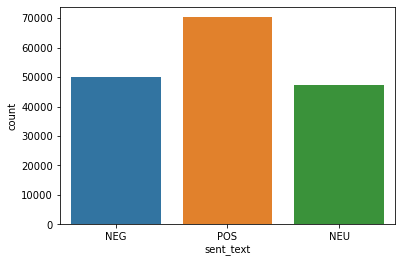

In [22]:
#plot balanced classes after apply median values (760x760) filter
sns.countplot(x = df[(df["image_height"]>=df["image_height"].median()) & (df["image_width"]>=df["image_width"].median())]["sent_text"]);

**Dados com imagens maiores que 512x512**

In [8]:
#quantity balanced classes after apply median values (512x512) filter
df[(df["image_height"]>=512) & (df["image_width"]>=512)].shape

(320915, 11)

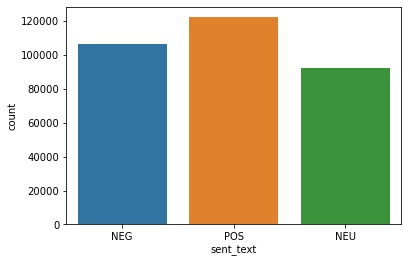

In [16]:
#plot balanced classes after apply median values (512x512) filter
sns.countplot(x = df[(df["image_height"]>=512) & (df["image_width"]>=512)]["sent_text"]);

**Dados com imagens maiores que 256x256**

In [9]:
#quantity balanced classes after apply median values (256x256) filter
df[(df["image_height"]>=256) & (df["image_width"]>=256)].shape

(437855, 11)

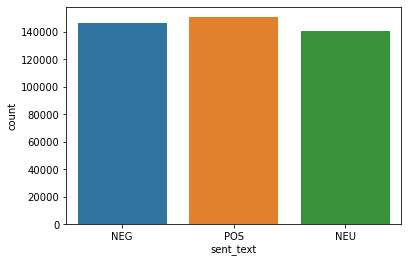

In [23]:
#plot balanced classes after apply median values (256x256) filter
sns.countplot(x = df[(df["image_height"]>=256) & (df["image_width"]>=256)]["sent_text"]);

**Dados com imagens maiores que 128x128**

In [18]:
df[(df["image_height"]>=128) & (df["image_width"]>=128)].shape

(462736, 11)

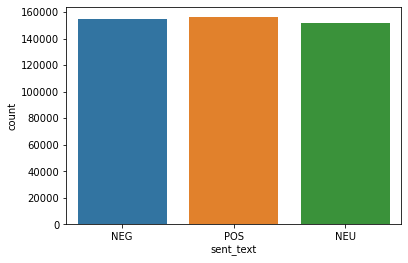

In [24]:
#plot balanced classes after apply median values (128x128) filter
sns.countplot(x = df[(df["image_height"]>=128) & (df["image_width"]>=128)]["sent_text"]);

**Test do resize**

<Figure size 432x288 with 0 Axes>

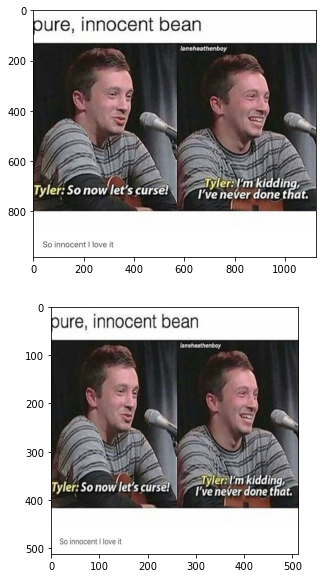

In [42]:
#see different image between original dim and  custom dim
path_image = "C:/Users/bhla/Residencia/Sidi/Analise de Sentimento/Datasets/b-t4sa_imgs/"
img = cv2.imread(path_image+df["image_path"][3])

width = 512
height = 512
dim = (width, height)

plt.figure();
f, axarr = plt.subplots(2,1,figsize=(10,10)) ;
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
axarr[1].imshow(cv2.cvtColor(cv2.resize(img, dim, interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2RGB));